In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [5]:
customer = pd.read_csv('customers.csv', delimiter=',')
customer.head()

,customer_id,birth_date,signed_up_from_channel
0,835f110d2db18bd1b3acc3a63063c59ad125a254,1967-01-01,Web
1,332d56903494dbe693961f0dd0cb71c18a4484a6,1995-01-01,Web
2,3c06e11e88d6bdcd4745a31e6e3d76f2d58c206d,1980-01-01,Web
3,550147e201b11906a024a7f410e6a46135cdef46,1951-01-01,Web
4,2efaa505f57c11be29c0bc56a26b0cadf8061fed,1987-01-01,Web


In [6]:
order_lines = pd.read_csv('order_lines.csv')
order_lines.head()

,order_id,customer_id,delivery_date,is_delivery,zip_place,product_id,quantity,net_unit_price,is_from_recipe,is_from_product_list
0,b5bd36902333660e728adbca18e72db305028c00,42d70c111366c2e57877a60da9482448c16a92c2,2018-01-01,True,Oslo,20329,1.0,45.22,False,False
1,b5bd36902333660e728adbca18e72db305028c00,42d70c111366c2e57877a60da9482448c16a92c2,2018-01-01,True,Oslo,9329,3.0,4.78,False,False
2,b5bd36902333660e728adbca18e72db305028c00,42d70c111366c2e57877a60da9482448c16a92c2,2018-01-01,True,Oslo,2329,1.0,25.13,False,False
3,b5bd36902333660e728adbca18e72db305028c00,42d70c111366c2e57877a60da9482448c16a92c2,2018-01-01,True,Oslo,8360,1.0,29.52,False,False
4,b5bd36902333660e728adbca18e72db305028c00,42d70c111366c2e57877a60da9482448c16a92c2,2018-01-01,True,Oslo,26525,2.0,2.96,False,False


In [7]:
products = pd.read_csv('products.csv')
products[products.product_id ==9329]

,product_id,product_name,main_category,sub_category,brand
5687,9329,Banan Colombia 1.00 stk,Frukt og grÃ¸nt,Frukt,NaN


# Analyse 

In [8]:
customer.dtypes


customer_id               object
birth_date                object
signed_up_from_channel    object
dtype: object

In [9]:
order_lines.dtypes

order_id                 object
customer_id              object
delivery_date            object
is_delivery                bool
zip_place                object
product_id                int64
quantity                float64
net_unit_price          float64
is_from_recipe             bool
is_from_product_list       bool
dtype: object

In [10]:
youngest = customer["birth_date"].min()
oldest = customer["birth_date"].max()
#print(youngest, oldest)

In [11]:
thisdate = datetime.datetime.now()
thisyear = thisdate.year
#print("Thisyear:", thisyear)


for rom in customer:
    customer['birth_date'] = customer['birth_date'].str.slice(0,4)

customer["birth_date"] = customer["birth_date"].astype(int)
mean_birth = customer['birth_date'].mean()
median_birth = customer['birth_date'].median()


print("Mean birth", mean_birth)
print("Median birth",median_birth)


Mean birth 1978.406976744186
Median birth 1981.0


In [12]:
#order_lines_drop = order_lines.drop(['product_id','quantity', 'net_unit_price', 'is_from_recipe', 'is_from_product_list'], axis = 1)

order_lines_gr = order_lines.groupby(['order_id']).first()
unique_customers = order_lines_gr['customer_id'].nunique()
unique_orders = len(order_lines_gr)

#print(order_lines_gr)



#Number of purchases for each customer
no_purchases = order_lines_gr.groupby(['customer_id'])['product_id'].count()
#Number of products each customer has purchased in total
no_products = order_lines.groupby(['customer_id'])['quantity'].sum()
order_lines["sum_product"] = order_lines['quantity']*order_lines['net_unit_price']
sum_products = order_lines.groupby(['customer_id'])['sum_product'].sum()


print("Sum of the orders:", no_products.sum())
print("No. of unique customer id's:",unique_customers)
print("No. of unique orders:", unique_orders)
print("Average order no.:", no_purchases.mean())
print("Median no: ", no_purchases.median())

#print("Sum Products", sum_products)
#print("Number of purchases: ", no_purchases)
#print()
#print("Number of products:", no_products)

Sum of the orders: 343802.0
No. of unique customer id's: 946
No. of unique orders: 8580
Average order no.: 9.069767441860465
Median no:  4.0


In [13]:
def purchase_stats(no_products, no_purchases, sum_products):
    frequent_avg = 0
    counter_freq = 0
    rarely_avg = 0
    counter_rare = 1
    frequent_sum = 0
    rarely_sum = 0
    money_freq = 0
    money_rare = 0
    for i in range (len(no_purchases)):
        if (no_purchases[i] >= 9):
            frequent_avg += int(no_products[i]/no_purchases[i])
            frequent_sum += no_products[i]
            money_freq += sum_products[i]/no_purchases[i]
            counter_freq += 1
            #print(no_products[col])
        else:
            rarely_avg += int(no_products[i]/no_purchases[i])
            rarely_sum += no_products[i]
            money_rare += (sum_products[i]/no_purchases[i])
            counter_rare += 1
                
    return frequent_avg, rarely_avg, counter_freq, counter_rare, frequent_sum, rarely_sum, money_freq, money_rare



In [58]:
freq_avg, rare_avg, count_freq, count_rare, freq_sum, rare_sum, freq_mon, rare_mon = purchase_stats(no_products, no_purchases, sum_products)
#This is how many unique items they bought. 
avg_freq = freq_avg/count_freq
avg_rare = rare_avg/count_rare
avg_mon_freq = freq_mon/count_freq
avg_mon_rare = rare_mon/count_rare
print()
print("Frequent shoppers:", count_freq)
print("Sum of products", freq_sum) 
print("Average no. of products per order: ", round(avg_freq, 2))
print("Average money spent on purchase:", round(avg_mon_freq,2), "kr")
print()
print("Unfrequent shoppers:", count_rare) 
print("Sum of products", rare_sum) 
print("Average no. of products per order: ", round(avg_rare, 2))
print("Average money spent on purchase:", round(avg_mon_rare, 2), "kr")



Frequent shoppers: 289
Sum of products 277710.0
Average no. of products per order:  42.11
Average money spent on purchase: 1118.06 kr

Unfrequent shoppers: 658
Sum of products 66092.0
Average no. of products per order:  33.46
Average money spent on purchase: 908.89 kr


In [15]:
#order_lines["is_delivery"] = order_lines["is_delivery"].astype(str)
#order_lines.dtypes

In [16]:
def delivery_type(no_products, no_purchases, sum_products):
    #Første index er antall personer som fikk varene hjemlevert. 
    #Andre indeex er antall eprsoner som plukket opp vare på hentested
    delivery_freq = np.array([[],[]])
    delivery_rare = np.array([[],[]])
    for i in range (len(no_purchases)):
        if (no_purchases[i] >= 9):
            if (order_lines["is_delivery"]== True):
                delivery_freq[0] += 1
            else:
                delivery_freq[1] += 1
        else:
            if (order_lines["is_delivery"] == True):
                delivery_rare[0] += 1
            else:
                delivery_rare[1] += 1
    return delivery_freq, delivery_rare

    

In [24]:
customer.dtypes

customer_id               object
birth_date                 int32
signed_up_from_channel    object
dtype: object

In [50]:
def age(no_products, no_purchases, sum_products, youngest, oldest):
    age_stats_freq = dict()
    age_stats_rare = dict()
    i = 1
    for i in range(len(no_products)):
        if (no_purchases[i] >= 9):
            if (customer["birth_date"][i] in age_stats_freq):
                age_stats_freq[customer["birth_date"][i]] += 1
            else:
                age_stats_freq[customer["birth_date"][i]] = 1
        else:
            if (customer["birth_date"][i] in age_stats_rare):
                age_stats_rare[customer["birth_date"][i]] += 1
            else:
                age_stats_rare[customer["birth_date"][i]] = 1
    temp1 = list(age_stats_freq.items())
    age_stats_freq = sorted(temp1)
    temp2 = list(age_stats_rare.items())
    age_stats_rare = sorted(temp2)
    return age_stats_freq, age_stats_rare

 

In [51]:
age_freq, age_rare = age(no_products, no_purchases, sum_products, youngest, oldest)

#age_freq = np.array(list(age_freq.keys()))




print(age_freq)
print()
print(age_rare)

[(1938, 1), (1942, 1), (1944, 1), (1946, 2), (1947, 1), (1948, 3), (1950, 1), (1951, 3), (1952, 3), (1953, 1), (1954, 1), (1955, 1), (1956, 2), (1958, 2), (1960, 2), (1961, 2), (1962, 3), (1963, 1), (1966, 1), (1967, 3), (1968, 5), (1969, 7), (1970, 4), (1971, 7), (1972, 4), (1973, 11), (1974, 10), (1975, 15), (1976, 8), (1977, 4), (1978, 15), (1979, 13), (1980, 11), (1981, 14), (1982, 13), (1983, 15), (1984, 12), (1985, 7), (1986, 13), (1987, 13), (1988, 10), (1989, 10), (1990, 4), (1991, 11), (1992, 5), (1993, 1), (1994, 4), (1995, 3), (1996, 2), (1997, 2), (2000, 1)]

[(1918, 1), (1927, 1), (1928, 1), (1930, 1), (1931, 1), (1933, 3), (1934, 1), (1936, 1), (1937, 3), (1940, 1), (1941, 1), (1945, 3), (1946, 1), (1947, 1), (1948, 1), (1949, 2), (1950, 3), (1951, 4), (1952, 2), (1953, 3), (1954, 1), (1955, 1), (1956, 2), (1957, 2), (1958, 1), (1959, 5), (1960, 4), (1961, 5), (1962, 4), (1963, 4), (1964, 7), (1965, 5), (1966, 6), (1967, 9), (1968, 11), (1969, 6), (1970, 8), (1971, 9), (1

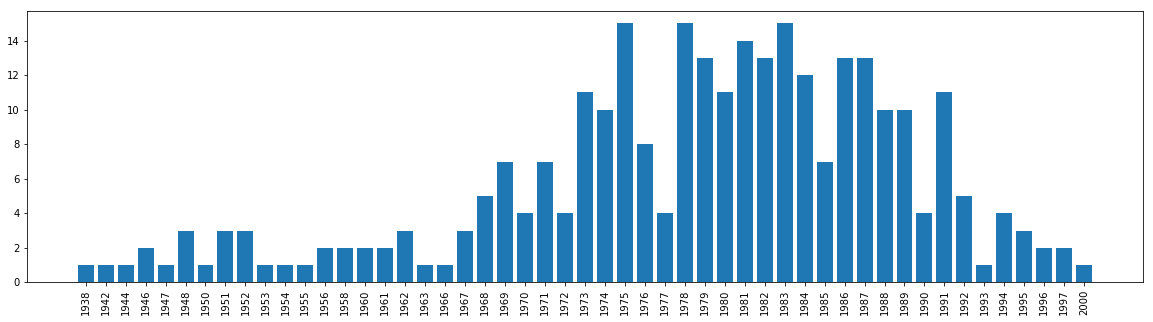

In [54]:

years = [y[0] for y in age_freq]
values = [y[1] for y in age_freq]

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.bar(range(len(age_freq)),values,tick_label=years)


plt.show()



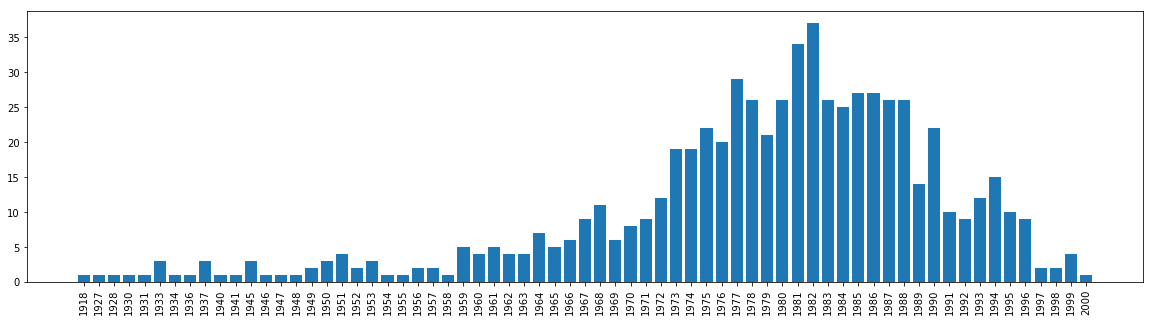

In [55]:

years = [y[0] for y in age_rare]
values = [y[1] for y in age_rare]

plt.figure(figsize=(20,5))
plt.xticks(rotation=90)
plt.bar(range(len(age_rare)),values,tick_label=years)


plt.show()
